## Imports

In [112]:
#Necessary libs
import numpy as np
import pandas as pd

#Vis libs
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

# ML libs
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer

#String manipulation libs
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from hazm import *
import re
import hazm

import warnings
warnings.filterwarnings('ignore')

## EDA

In [113]:
book_data = pd.read_excel('E:/Python Scripts/courses-main/machine learning/final_books.xlsx')
book_data

,title,date,content,category,author,comments
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه
...,...,...,...,...,...,...
2819,آشنایی با علم رباتیک,۱۲ اردیبهشت ۱۳۸۸,NaN,رباتیک,شبنم عاقلی,۲۱ دیدگاه
2820,دانلود مجله الکترونیکی برنامه نویس – شماره اول,۱۱ اردیبهشت ۱۳۸۸,NaN,برنامه نویسی,Barnamenevis.org,۱۰ دیدگاه
2821,داستان خواستگاری یا انتخاب,۱۱ اردیبهشت ۱۳۸۸,کتابی که می خواهید مطالعه کنید به صورت فیلم ن...,داستان و رمان,م. مودب پور,۱۲ دیدگاه
2822,آشنایی با قطعات سخت افزاری کامپیوتر,۱۱ اردیبهشت ۱۳۸۸,NaN,سخت افزار,پارس بوک,۵۲ دیدگاه


In [114]:
book_data.sample(10)

,title,date,content,category,author,comments
283,تکنیک های ذهن آگاهی,۲۵ مهر ۱۳۹۷,حضور ذهن چنانچه کبات زین می گوید به معنی توجه...,روانشناسی,بابک وزیری,۱ دیدگاه
852,گردان قاطرچی ها,۳ خرداد ۱۳۹۵,رمان «گردان قاطرچی‌ها» درباره یکی از گردان ها...,داستان و رمان,داوود امیریان,۵ دیدگاه
918,مثبت اندیش باش تا کامروا باشی!,۱۰ اسفند ۱۳۹۴,یکی از بزرگترین نعمت ها و قدرت هایی که خداوند...,روانشناسی,رضا فریدون نژاد,۸ دیدگاه
1424,شناخت دوره اشکانیان,۶ تیر ۱۳۹۳,اشکانیان بر آمده از قومی سکایی به نام پرنی بو...,تاریخ ایران,مهران خواجه,۴ دیدگاه
412,دانلود تقویم رسمی سال ۱۳۹۷,۱ فروردین ۱۳۹۷,تقویم رسمی سال ۱۳۹۷خورشیدی به همراه ماههای قمر...,دسته‌بندی نشده,موسسه ژئوفیزیک دانشگاه تهران,۲ دیدگاه
1181,کشتار یک ملت,۱ اردیبهشت ۱۳۹۴,محتویات این کتاب بر اساس گواهی‌های غیرقابل تکذ...,سیاسی,آرنولد توین بی,۵ دیدگاه
1646,شاید باور نکنید,۱۳ مهر ۱۳۹۲,"\n, عمران صلاحی زندگی‌نامه‌ خودنوشتش در معرفی ...",داستان و رمان,عمران صلاحی,۵ دیدگاه
1360,تاریخ آل مظفر,۲۰ شهریور ۱۳۹۳,تاریخ آل مظفر، نوشته محمود کتبى، به اهتمام عب...,تاریخ ایران,محمود کتبی,۱ دیدگاه
2349,مجموعه ی ۸۸ داستان فارسی,۴ اردیبهشت ۱۳۹۰,در این کتاب مجموعه داستان شما می توانید ۸۸ دا...,داستان و رمان,نامشخص,۳۳ دیدگاه
543,رمان نفرین صندلی,۲۷ مرداد ۱۳۹۶,گروهی از افراد که به ظاهر ارتباطی با هم ندارند...,داستان و رمان,شروین وکیلی,۲ دیدگاه


In [115]:
book_data.shape

(2824, 6)

In [116]:
book_data.columns

Index(['title', 'date', 'content', 'category', 'author', 'comments'], dtype='object')

In [117]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2824 non-null   object
 1   date      2824 non-null   object
 2   content   2441 non-null   object
 3   category  2824 non-null   object
 4   author    2824 non-null   object
 5   comments  2824 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


In [118]:
#Change type of columns to string
book_data = book_data.astype('string')

In [119]:
book_data.dtypes

title       string
date        string
content     string
category    string
author      string
comments    string
dtype: object

In [120]:
book_data.nunique()

title       2822
date        2558
content     2412
category      56
author      2030
comments     102
dtype: int64

In [121]:
book_data['author'].value_counts().head(10)

نامشخص                                 166
رضا فریدون نژاد                         33
سازمان پژوهش و برنامه ریزی آموزشی       31
شروین وکیلی                             28
پارس بوک                                26
مجله ویستا                              20
ماهنامه شبکه                            15
فاطمه شعیبی                             11
                                        10
عزیز نسین                               10
Name: author, dtype: Int64

In [122]:
book_data['category'].value_counts()

داستان و رمان         352
تاریخ ایران           210
پزشکی و سلامت         186
روانشناسی             171
جامعه شناسی           143
برنامه نویسی          100
دینی و مذهبی           95
آموزش زبان             91
درسی و دانشگاهی        84
تاریخ جهان             78
اقتصاد                 72
شعر و غزل              69
آموزشهای متفرقه        64
ادبیات                 61
سیاسی                  57
آموزش نرم افزار        53
دسته‌بندی نشده         51
فلسفه                  48
ایران                  46
شبکه کامپیوتری         45
اینترنت و وب           40
خانه و خانواده         39
ورزش                   39
سیستم عامل             36
علوم مهندسی            34
آفیس                   34
طراحی وب سایت          32
سخت افزار              30
طنز و سرگرمی           29
حیوانات                29
کودکان و نوجوانان      28
هنر و خلاقیت           28
زندگینامه              28
علوم ماورا طبیعی       27
جغرافیا و گردشگری      26
نجوم و ستاره شناسی     25
آشپزی و شیرینی پزی     23
حقوق و قضایی           23
موسیقی      

In [123]:
book_data['content'][0]

' تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی است. سمینار های تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است. در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها، خواهان تجربه و تلاش زیادی هستند. مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است. او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد. موعظه\u200cهای\xa0 و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند. این کتاب گزیده ای از سخنرانی های آقای جیکز ، یکی از بهترین سخنران های انگیزشی در دنیا است. امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود'

In [124]:
len(book_data['content'][0])

634

In [125]:
book_data['title'][90:111]

90                              آشنایی با اصول انبارداری
91                                آموزش تصویری اکسل ۲۰۱۹
92                            آموزش حسابداری و امور مالی
93                                         فرمول خوشبختی
94                         پند بزرگان از روزنامه اطلاعات
95                                    داستان های مدیریتی
96             تاریخ ۲ – دوره عمومی آموزش بزرگسالان ۱۳۵۳
97                                       کشکول شیخ بهایی
98                            دانستنی های بارداری و تولد
99                    نهج البلاغه همراه شرح وقایع تاریخی
100                                     تاریخ ایران زمین
101                         بیمه، یک تسکین یا دردی پنهان
102                                     حقوقدانان و قضات
103                                          مثنوی معنوی
104                                         علم کامپیوتر
105     چگونه با یک میلیون صاحب سرمایه ۱۲۰ میلیاردی ش...
106                                    دانستنی‌های پزشکی
107                            

## Check For Missing/Null Values

In [126]:
book_data.isnull().sum()

title         0
date          0
content     383
category      0
author        0
comments      0
dtype: int64

In [127]:
# drop all null/ missing values
book_data = book_data.dropna()

## Duplicare Rows

In [128]:
sum(book_data.duplicated())

0

## Data Cleaning

#### Normalize Content column

In [129]:
#create Normalizer object from hazm library
normalizer1 = Normalizer()

In [130]:
def normal(text):
    text=str(text)
    text = normalizer1.character_refinement(text)
    text = normalizer1.punctuation_spacing(text)
    text = normalizer1.affix_spacing(text)
    text = normalizer1.normalize(text)
    return text

In [131]:
#Filter out useless data>>stop words
stopwords = []
file = open('E:/Python Scripts/courses-main/stop.txt',encoding="utf8").read()
[stopwords.append(x) for x in file.split('\n')]
stopwords = set(stopwords)

def remove_stopwords(text):
    text=str(text)
    filtered_tokens = [token for token in text.split() if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [132]:
#Remove halfspace,extra spaces and extralines 
def remove_halfspace(text): 
    emoji_pattern = re.compile("["                
                u"\u200c"              
    "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text) 

def remove_extraspaces(text):
    return re.sub(r' +', ' ', text)

def remove_extranewlines(text):
    return re.sub(r'\n\n+', '\n\n', text)

In [133]:
#Remove characters and english words
def remove_char(text): 
    return  re.sub(r'[$+&+;+]|[><!+،:’,\(\).+]|[-+]|[…]|[\[\]»«//]|[\\]|[#+]|[_+]|[—+]|[*+]|[؟+]|[?+]|[""]', ' ', str(text)) 

def remove_englishword(text): 
    return re.sub(r'[A-Za-z]+', '', str(text))

In [134]:
def remove_emoji(text): 
    emoji_pattern = re.compile("["
                u"\u200d"
                u"\u200c"
                u"\u200e"
                u"\u200f"
    "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text)

In [135]:
#lemmatize the text
lemmatizer = Lemmatizer()

def lemma(text):
    text=str(text)
    return lemmatizer.lemmatize(text)

In [136]:
def preprocess_text(text):
    text = remove_englishword(text)
    text = normal(text)
    text = remove_stopwords(text) 
    text = remove_emoji(text)
    text = remove_char(text)
    text = remove_extraspaces(text)
    text = lemma(text)
    text = remove_extranewlines(text)
    text = remove_halfspace(text) 
    text = remove_stopwords(text)
    return text

In [137]:
#Clean content for properly train 
df1= list(map(preprocess_text, book_data["content"]))

In [138]:
book_data['content'][0]

' تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی است. سمینار های تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است. در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها، خواهان تجربه و تلاش زیادی هستند. مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است. او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد. موعظه\u200cهای\xa0 و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند. این کتاب گزیده ای از سخنرانی های آقای جیکز ، یکی از بهترین سخنران های انگیزشی در دنیا است. امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود'

In [139]:
df1[0]

'جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس انگیزشی دلیل ایران سخنران انگیزشی پوست لقب زندگینامه جیکس شاهد فعالیت مختلفی خواهان تجربه تلاش زیادی مواردی فعالیت جیکس کشیش خانه پاتر مخاطبان موعظه سخنرانی جیکس کلیسا شبکه تلویزیونی رادیویی پخش کتاب گزیده سخنرانی جیکز سخنران انگیزشی دنیا امید مطالعه باور عمیق تغییری مثبت زندگیتان ایجاد'

In [140]:
book_data['content'] = df1

In [141]:
book_data

,title,date,content,category,author,comments
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس ...,روانشناسی,سارا رزولت,بدون دیدگاه
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب دسترس خوانندگان محترم مشتمل تاریخ اوضاع س...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات پزشکی مقدمه کتاب نگ...,تاریخ ایران,فتح الله بینا,بدون دیدگاه
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه مطالبیست گروه اینجانب کتب انگلیسی ٢٠١۵ ...,علم و دانش,مانی منوچهری,بدون دیدگاه
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته کتی هایدن زبانی کودکا...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه
...,...,...,...,...,...,...
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسان...,۲ خرداد ۱۳۸۸,پروژه مربوط درس محیطهای رسانه ایی مفاهیم آشنا ...,مقالات علمی,محدثه طاهری,۱۳ دیدگاه
2794,PDF کیمیای محبت اثر محمد ری شهری,۱ خرداد ۱۳۸۸,رجبعلی نکوگویان مشهور جناب شیخ شیخ رجبعلی خیاط...,دینی و مذهبی,محمد ری شهری,۳۵ دیدگاه
2796,PDF مجموعه خلاصه ۱۹ رمان فارسی,۳۰ اردیبهشت ۱۳۸۸,کتاب متن ۱۹ رمان زیبای فارسی وار بیان رمانها ۱...,داستان و رمان,پارس بوک,۲۹ دیدگاه
2809,PDF آموزش ۱۲۳ ترفند رجیستری,۱۸ اردیبهشت ۱۳۸۸,,مهارت و ترفند,:پارس بوک,۲۳ دیدگاه


In [142]:
book_data[book_data['content'] == '']

,title,date,content,category,author,comments
743,هلوکاست ، دروغ بزرگ یهودیان,۳۰ آبان ۱۳۹۵,,تاریخ جهان,حمیدرضا نیک بخش,۷ دیدگاه
2132,بازار های مالی بین الملل,۲۶ بهمن ۱۳۹۰,,اقتصاد,مرتضی علی یگانه,۹ دیدگاه
2379,اسرار رجیستری,۲۱ اسفند ۱۳۸۹,,سیستم عامل,جواد سلطانی,۴۲ دیدگاه
2387,آموزش برنامه نویسی ویندوز موبایل در .net comp...,۱۳ اسفند ۱۳۸۹,,برنامه نویسی,مهدی محبیان,۱۰ دیدگاه
2391,آموزش برنامه نویسی ویندوز موبایل,۷ اسفند ۱۳۸۹,,برنامه نویسی,مهدی محبیان,۸ دیدگاه
2395,نگین آفرینش,۳ اسفند ۱۳۸۹,,دینی و مذهبی,محمد بالا دستیان ، محمد مهدي حایري پ...,۹ دیدگاه
2441,ساختار شبکه GSM,۲۶ آذر ۱۳۸۹,,شبکه کامپیوتری,نامشخص,۱۶ دیدگاه
2459,چگونه ترافیک سایت را افزایش دهیم؟,۲ آذر ۱۳۸۹,,طراحی وب سایت,نامشخص,۱۱ دیدگاه
2531,آموزش ساخت یک متن سه بعدی با فوتوشاپ,۲۱ مرداد ۱۳۸۹,,آموزش نرم افزار,نامشخص,۳۸ دیدگاه
2579,مرجع فارسی CSS,۲۹ اردیبهشت ۱۳۸۹,,طراحی وب سایت,احمد عادلی,۱۵ دیدگاه


In [143]:
#Remove empty content 
book_data.drop(book_data[book_data['content'] == ''].index, inplace = True)

#### Clean category

In [144]:
def preprocess_text4(text):
    text = normal(text) 
    text = remove_emoji(text)
    text = remove_char(text)
    text = remove_extraspaces(text)
    text = remove_extranewlines(text)
    text = remove_halfspace(text)
    return text

In [145]:
df4= list(map(preprocess_text4, book_data["category"]))

In [146]:
book_data["category"] = df4

In [147]:
book_data["category"] = book_data["category"].astype(str)

#### Normalize Title column

In [148]:
book_data['title']

0                                    بهترین درسهای زندگی‎
1                                      از سلاجقه تا صفویه
2                                           سرگذشت رضاشاه
3                          سیری نوین در فرگشت و اسرار مغز
4                                           آسمان پرستاره
                              ...                        
2787     PDF  برنامه غذایی کودکان و نوزادان از ۶ ماهگی...
2793     صدا در کامپیوتر – پروژه درس محیط های چند رسان...
2794                    PDF  کیمیای محبت اثر محمد ری شهری
2796                      PDF  مجموعه خلاصه ۱۹ رمان فارسی
2821                           داستان خواستگاری یا انتخاب
Name: title, Length: 2411, dtype: string

In [149]:
def preprocess_text2(text):
    text = remove_englishword(text)
    text = remove_emoji(text)
    return text

In [150]:
df2 = list(map(preprocess_text2, book_data["title"]))

In [151]:
book_data["title"] = df2

In [152]:
book_data["title"]

0                                    بهترین درسهای زندگی 
1                                      از سلاجقه تا صفویه
2                                           سرگذشت رضاشاه
3                          سیری نوین در فرگشت و اسرار مغز
4                                           آسمان پرستاره
                              ...                        
2787       برنامه غذایی کودکان و نوزادان از ۶ ماهگی تا...
2793     صدا در کامپیوتر – پروژه درس محیط های چند رسان...
2794                         کیمیای محبت اثر محمد ری شهری
2796                           مجموعه خلاصه ۱۹ رمان فارسی
2821                           داستان خواستگاری یا انتخاب
Name: title, Length: 2411, dtype: object

#### Clean Comments

In [153]:
book_data['comments'][0].split()[0]

'بدون'

In [154]:
def Replace(x):
    return x.replace('بدون','0')

In [155]:
book_data['comments'] = book_data['comments'].apply(lambda x: f'{Replace(x)}')

In [156]:
book_data['comments'][0].split()[0]

'0'

In [157]:
def cut(x):
    return x.split()[0]

In [158]:
book_data['comments'] = book_data['comments'].apply(lambda x: f'{cut(x)}')

In [159]:
book_data

,title,date,content,category,author,comments
0,بهترین درسهای زندگی,۲ دی ۱۳۹۸,جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس ...,روانشناسی,سارا رزولت,0
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب دسترس خوانندگان محترم مشتمل تاریخ اوضاع س...,تاریخ ایران,نصرت الله مشکوتی,0
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات پزشکی مقدمه کتاب نگ...,تاریخ ایران,فتح الله بینا,0
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه مطالبیست گروه اینجانب کتب انگلیسی ٢٠١۵ ...,علم و دانش,مانی منوچهری,0
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته کتی هایدن زبانی کودکا...,کودکان و نوجوانان,کتی هایدن,0
...,...,...,...,...,...,...
2787,برنامه غذایی کودکان و نوزادان از ۶ ماهگی تا...,۵ خرداد ۱۳۸۸,کتاب شامل بخشهای ۱ اصول تغذیه تکمیلی شروع ادام...,کودکان و نوجوانان,دکتر حسین آشوری,۱۵
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسان...,۲ خرداد ۱۳۸۸,پروژه مربوط درس محیطهای رسانه ایی مفاهیم آشنا ...,مقالات علمی,محدثه طاهری,۱۳
2794,کیمیای محبت اثر محمد ری شهری,۱ خرداد ۱۳۸۸,رجبعلی نکوگویان مشهور جناب شیخ شیخ رجبعلی خیاط...,دینی و مذهبی,محمد ری شهری,۳۵
2796,مجموعه خلاصه ۱۹ رمان فارسی,۳۰ اردیبهشت ۱۳۸۸,کتاب متن ۱۹ رمان زیبای فارسی وار بیان رمانها ۱...,داستان و رمان,پارس بوک,۲۹


In [160]:
#Change type of comments
book_data['comments'] = book_data['comments'].astype(int)

#### Clean date

In [161]:
#Import Normalizer from parsivar library
#from parsivar import Normalizer

In [162]:
#date_normalizer = Normalizer(date_normalizing_needed = True)

In [163]:
#def create_date(x):
   #return date_normalizer.normalize(x).replace('y','').replace('m','/').replace('d','/')

In [164]:
book_data['date'][6].split()[2]

'۱۳۹۸'

In [165]:
def cut2(x):
    return x.split()[2]

In [166]:
book_data['date'] = book_data['date'].apply(lambda x: f'{cut2(x)}')

In [167]:
book_data['date'] = book_data['date'].astype(int)

In [168]:
book_data.dtypes

title       object
date         int32
content     object
category    object
author      string
comments     int32
dtype: object

#### Clean author

In [169]:
book_data[book_data['author'] == '            ']

,title,date,content,category,author,comments
8,معرفی کتاب الکترونیکی,1398,آغاز تاریخ بشریت شکل کتاب تغییر روزی نوشتن لوح...,دسته بندی نشده,,0
1268,مدیریت استراتژیک,1393,مدیریت استراتژیک فرایندی سازمانی تعریف راهبرد ...,جامعه شناسی,,13
1272,مقدمه ای بر نظریه کدگذاری,1393,نظریه کدگذاری نظریهٔ رمزنگاری بررسی کدگذاری اط...,درسی و دانشگاهی,,4
1438,بیوگرافی بازیگران ایرانی,1393,کتاب بیوگرافی زندگینامه آثار عکس صدها بازیگر ق...,زندگینامه,,10
1534,مرگ فروشان,1392,آلفرد جوزف هیچکاک کارگردانی بریتانیایی فعالیت ...,داستان و رمان,,6
2036,امنیت گوگل,1391,مطالعه کتاب امنیت گوگل مطمئنا درک عمیق متفاوتی...,اینترنت و وب,,6
2241,تاریخ ادبیات افغانستان,1390,کتاب اقدام تدوین تاریخ ادبیات افغانستان مولفین...,ادبیات,,10


In [170]:
book_data['author'].value_counts()

نامشخص                                 106
رضا فریدون نژاد                         33
سازمان پژوهش و برنامه ریزی آموزشی       31
شروین وکیلی                             28
مجله ویستا                              20
                                      ... 
شهباز یعقوبی                             1
گیم ارور                                 1
اصغر طاهر زاده                           1
مرتضی هومان فرد، محمد جواد فتوحی         1
م. مودب پور                              1
Name: author, Length: 1766, dtype: Int64

In [171]:
def preprocess_text3(text):
    text = remove_extraspaces(text)
    text = remove_extranewlines(text)
    text = remove_halfspace(text) 
    return text

In [172]:
df3= list(map(preprocess_text3, book_data["author"]))

In [173]:
df3

[' سارا رزولت ',
 ' نصرت الله مشکوتی ',
 ' فتح الله بینا ',
 ' مانی منوچهری ',
 ' کتی هایدن ',
 ' رشید الدین فضل الله ',
 ' مایا ',
 ' هادی محمدپور ',
 ' ',
 ' دکتر علی نورائی ',
 ' علی شریعتی ',
 ' ابراهیم صفایی ',
 ' بابک وزیری ',
 ' بهنام خانی ',
 ' دکتر لیدا شاهسونی ',
 ' سلیمان حییم ',
 ' حسن حسینی استرآبادی ',
 ' علی شریعتی ',
 ' چارلز دیکنز ',
 ' فرشید باباجانی ',
 ' دکتر محمدجواد مشکور ',
 ' شهرام خدادادی ',
 ' نامشخص ',
 ' آکادمی آی تی ',
 ' رضا سروری ',
 ' عطار نیشابوری ',
 ' سرهنگ هویدا تزار ',
 ' مسعود شباهنگ ',
 ' محمد نظری گندشمین ',
 ' ناخدا بزرگ شهریار رامهرمزي ',
 ' صدای روسیه ',
 ' فتح الله احمدزاده ',
 ' علی صابریان ',
 ' دیانا مالوک ',
 ' مهدی آقابابائی ',
 ' حسن توانایان فرد ',
 ' کامران افشار ',
 ' محمدعلی حاجی سیدجوادی ',
 ' احسان کوثری نیا ',
 ' احسان کوثری نیا ',
 ' ماهنامه شبکه ',
 ' مصطفی جلیلیانفر ',
 ' نامشخص ',
 ' آیزاک آسیموف ',
 ' ران زاچارسکی ',
 ' صادق زیباکلام ',
 ' ضیاالدین جزایری ',
 ' علی احمد علیزاده ',
 ' مهراد جاویدی ',
 ' هادی عبدالهیان ',
 ' ع

In [174]:
book_data["author"] = df3

In [175]:
#book_data[book_data['author'] == ' ']

In [176]:
#book_data = book_data[book_data['author'] != ' ']


## Visualization

In [177]:
book_data.head(10)

,title,date,content,category,author,comments
0,بهترین درسهای زندگی,1398,جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس ...,روانشناسی,سارا رزولت,0
1,از سلاجقه تا صفویه,1398,کتاب دسترس خوانندگان محترم مشتمل تاریخ اوضاع س...,تاریخ ایران,نصرت الله مشکوتی,0
2,سرگذشت رضاشاه,1398,دکتر فتح الله بینا تحصیلات پزشکی مقدمه کتاب نگ...,تاریخ ایران,فتح الله بینا,0
3,سیری نوین در فرگشت و اسرار مغز,1398,مجموعه مطالبیست گروه اینجانب کتب انگلیسی ٢٠١۵ ...,علم و دانش,مانی منوچهری,0
4,آسمان پرستاره,1398,کتاب آسمان پرستاره نوشته کتی هایدن زبانی کودکا...,کودکان و نوجوانان,کتی هایدن,0
5,تاریخ مبارک غازانی,1398,تاریخ مبارک غازانى فارسی رشیدالدین فضل الله بن...,تاریخ ایران,رشید الدین فضل الله,0
6,وبلاگ نویسی شیرین با وردپرس,1398,کتاب وبلاگ نویسی آموزش سکوی انتشار مبتنی وب بی...,طراحی وب سایت,مایا,0
7,نقش روابط جنسی و راز کامیابی در زندگی,1398,استاد پروفسور ویلسون بیماریهای زنان هورمون زنا...,پزشکی و سلامت,هادی محمدپور,0
8,معرفی کتاب الکترونیکی,1398,آغاز تاریخ بشریت شکل کتاب تغییر روزی نوشتن لوح...,دسته بندی نشده,,0
9,فرهنگ ریشه واژگان فارسی,1398,ساختار کتاب رویه درآیه پوروا هندواروپایی نمودا...,آموزش زبان,دکتر علی نورائی,0


#### Reshape columns for better visualizing

In [178]:
def reshape_persian_text(label):
         return get_display(reshape(label))

In [179]:
book_data['cate_reshape'] = book_data['category'].apply(lambda x: f'{reshape_persian_text(x)}')

In [180]:
book_data['author_reshape'] = book_data['author'].apply(lambda x: f'{reshape_persian_text(x)}')

#### Figures

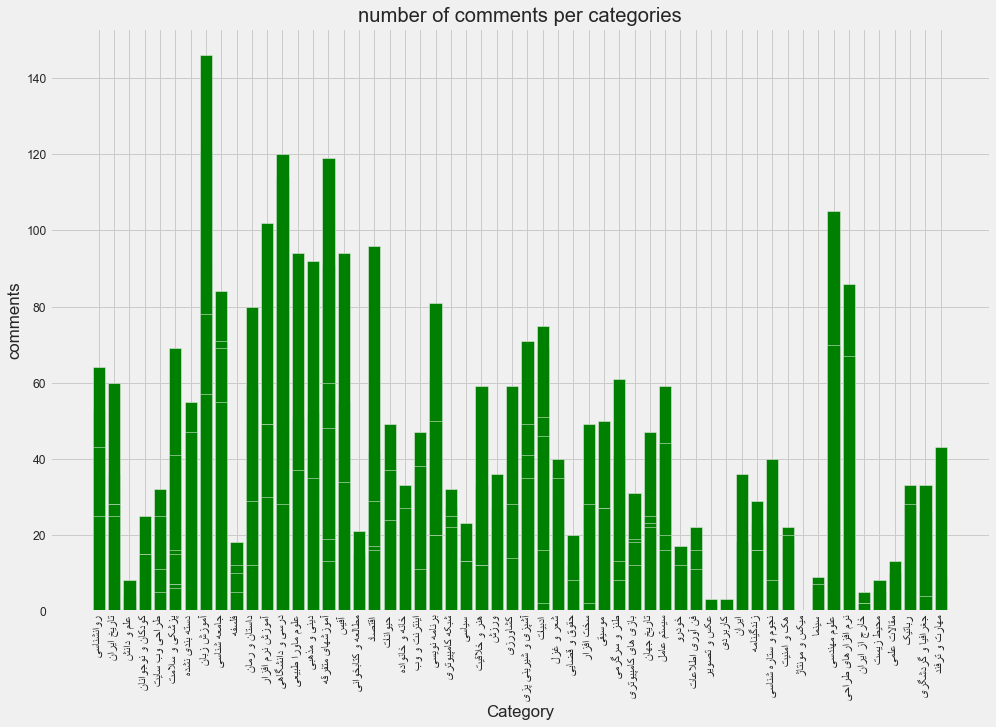

In [181]:
plt.figure(figsize = (15,10))
plt.bar(book_data['cate_reshape'],book_data['comments'],color = 'green')
plt.title('number of comments per categories')
plt.ylabel('comments')
plt.xlabel('Category')
plt.xticks(rotation = 90) 
plt.show()

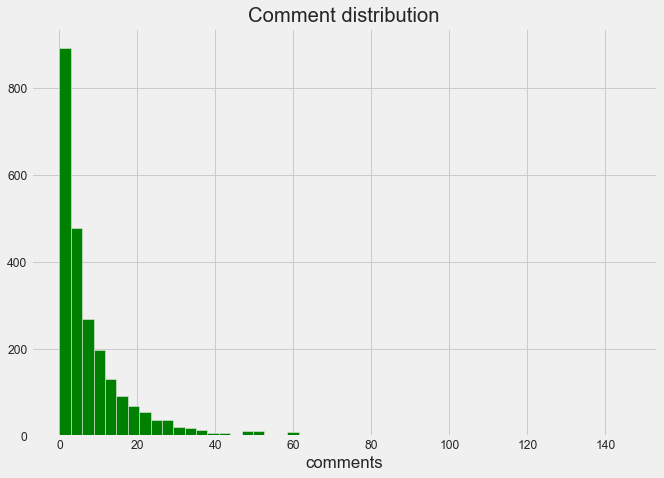

In [182]:
plt.figure(figsize = (10,7))
plt.hist(book_data['comments'],bins=50,color = 'green')
plt.title('Comment distribution')
plt.xlabel('comments')
plt.show()

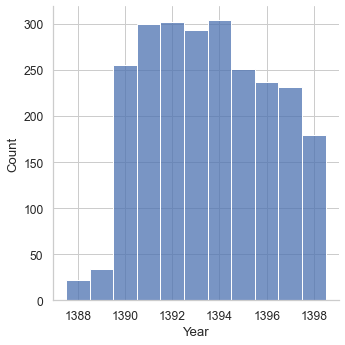

In [183]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
sns.displot(book_data,x='date',bins=10, discrete=True).set(xlabel='Year', ylabel='Count')
plt.show()

In [184]:
book_data.groupby('category')['comments'].mean().sort_values(ascending=False).reset_index()

,category,comments
0,نرم افزارهای طراحی,45.200000
1,مهارت و ترفند,26.000000
2,آموزش نرم افزار,18.190476
3,آموزش زبان,17.361446
4,آفیس,17.259259
5,آموزشهای متفرقه,16.684211
6,علوم ماورا طبیعی,15.736842
7,آشپزی و شیرینی پزی,15.150000
8,برنامه نویسی,14.416667
9,علوم مهندسی,13.133333


<Figure size 1152x720 with 0 Axes>

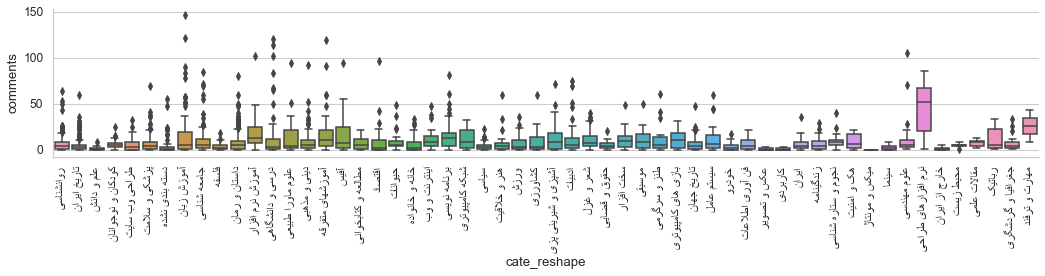

<Figure size 1152x720 with 0 Axes>

In [185]:
sns.catplot(x='cate_reshape', y="comments", kind="box", data=book_data,height=3, aspect=5)
plt.xticks(rotation=90)
plt.figure(figsize = (16,10))

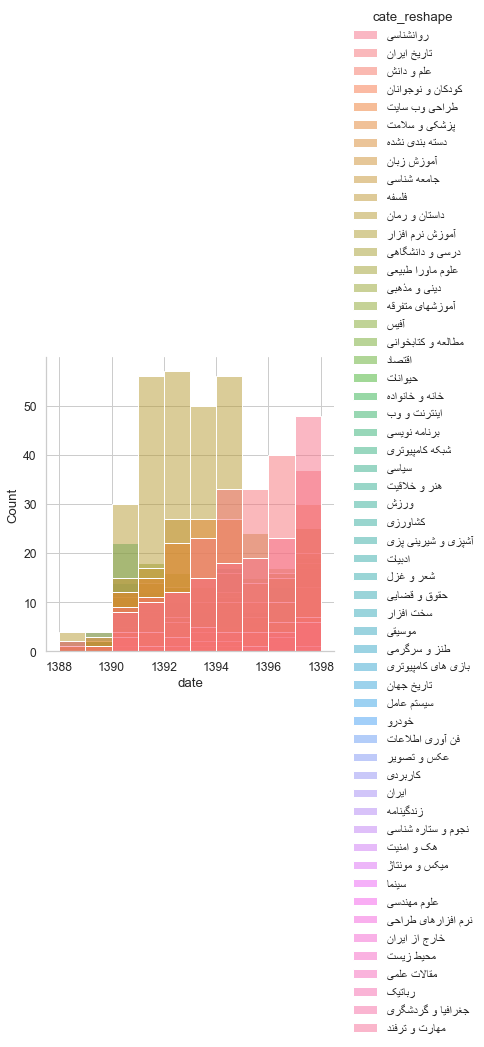

In [186]:
sns.displot(book_data,x='date',bins=10,hue='cate_reshape')

In [187]:
book_data.groupby(['category'])['author'].nunique().sort_values(ascending=False).reset_index(name = 'number of authors').head(20)

,category,number of authors
0,داستان و رمان,240
1,تاریخ ایران,170
2,روانشناسی,126
3,پزشکی و سلامت,121
4,جامعه شناسی,106
5,آموزش زبان,70
6,تاریخ جهان,70
7,دینی و مذهبی,67
8,درسی و دانشگاهی,64
9,سیاسی,51


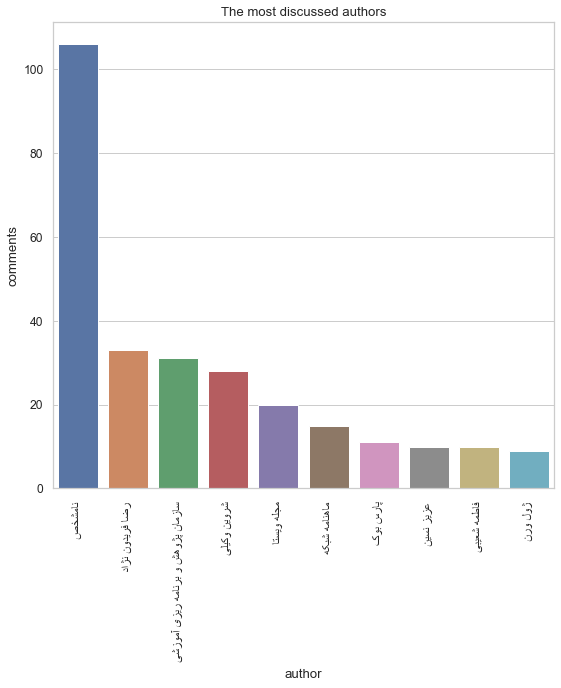

<Figure size 1080x576 with 0 Axes>

In [188]:
gplot = book_data.groupby(['author_reshape'])['comments'].size().sort_values(ascending=False).head(10)
sns.barplot(x = gplot.index, y = gplot.values)
plt.title('The most discussed authors')
plt.ylabel('comments')
plt.xlabel('author')
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))
plt.show()

In [189]:
#Remove reshaped column
book_data.drop(['cate_reshape'], inplace=True, axis=1)
book_data.drop(['author_reshape'], inplace=True, axis=1)

In [190]:
book_data

,title,date,content,category,author,comments
0,بهترین درسهای زندگی,1398,جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس ...,روانشناسی,سارا رزولت,0
1,از سلاجقه تا صفویه,1398,کتاب دسترس خوانندگان محترم مشتمل تاریخ اوضاع س...,تاریخ ایران,نصرت الله مشکوتی,0
2,سرگذشت رضاشاه,1398,دکتر فتح الله بینا تحصیلات پزشکی مقدمه کتاب نگ...,تاریخ ایران,فتح الله بینا,0
3,سیری نوین در فرگشت و اسرار مغز,1398,مجموعه مطالبیست گروه اینجانب کتب انگلیسی ٢٠١۵ ...,علم و دانش,مانی منوچهری,0
4,آسمان پرستاره,1398,کتاب آسمان پرستاره نوشته کتی هایدن زبانی کودکا...,کودکان و نوجوانان,کتی هایدن,0
...,...,...,...,...,...,...
2787,برنامه غذایی کودکان و نوزادان از ۶ ماهگی تا...,1388,کتاب شامل بخشهای ۱ اصول تغذیه تکمیلی شروع ادام...,کودکان و نوجوانان,دکتر حسین آشوری,15
2793,صدا در کامپیوتر – پروژه درس محیط های چند رسان...,1388,پروژه مربوط درس محیطهای رسانه ایی مفاهیم آشنا ...,مقالات علمی,محدثه طاهری,13
2794,کیمیای محبت اثر محمد ری شهری,1388,رجبعلی نکوگویان مشهور جناب شیخ شیخ رجبعلی خیاط...,دینی و مذهبی,محمد ری شهری,35
2796,مجموعه خلاصه ۱۹ رمان فارسی,1388,کتاب متن ۱۹ رمان زیبای فارسی وار بیان رمانها ۱...,داستان و رمان,پارس بوک,29


## Modeling

In [191]:
book_data.dtypes

title       object
date         int32
content     object
category    object
author      object
comments     int32
dtype: object

In [192]:
book_data['content'] = book_data['content'].astype('string')
#book_data['author'] = book_data['author'].astype('string')

### Clustering using content

#### Kmeans


In [193]:
#content Clustering with TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(book_data['content'])

In [194]:
type(X)

scipy.sparse.csr.csr_matrix

In [195]:
from sklearn.decomposition import PCA
# initialize PCA with 2 components for visualization
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [196]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [197]:
sse

[2356.098927826154,
 2347.5879525545542,
 2340.0366291023606,
 2332.5988315345944,
 2327.606276948529,
 2320.8427009304546,
 2319.365022470757,
 2313.9353219897016,
 2309.4830977626625]

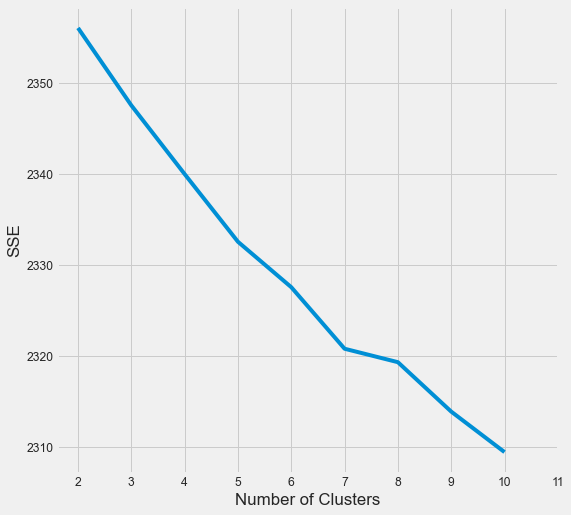

In [198]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [199]:
# initialize kmeans with 8 centroids
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

In [200]:
#returns the top n keywords for each centroid
def get_top_keywords(n_terms):

    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF 
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(10)


Cluster 0
منتشر,چاپ,آثار,مجموعه,نوشته,رمان,زندگی,نویسنده,کتاب,داستان

Cluster 1
قرآن,بررسی,علمی,تاریخ,زندگی,فلسفه,جهان,علم,کتاب,انسان

Cluster 2
کشور,حکومت,جنگ,دولت,دوره,تاریخی,سیاسی,کتاب,تاریخ,ایران

Cluster 3
گیاهان,غذایی,بدن,مواد,مصرف,پزشکی,درمان,کتاب,اطلاعات,بیماری

Cluster 4
قالب,میلادی,رویدادهای,نجومی,قمری,تقویم,تعطیلی,پیشبینی,ماههای,مناسبتهای

Cluster 5
فرهنگ,لغات,آموزش,یادگیری,ترجمه,واژه,کتاب,انگلیسی,فارسی,زبان

Cluster 6
دست,توجه,موفقیت,کسب,آشنا,مطالعه,آموزش,افراد,زندگی,کتاب

Cluster 7
شبکه,کتاب,سایت,نویسی,آموزش,طراحی,وب,ویندوز,سیستم,افزار


In [201]:
X = pd.DataFrame(X.toarray())

In [202]:
# assign clusters and pca vectors to our dataframe 
X['cluster'] = clusters
X['x0'] = x0
X['x1'] = x1

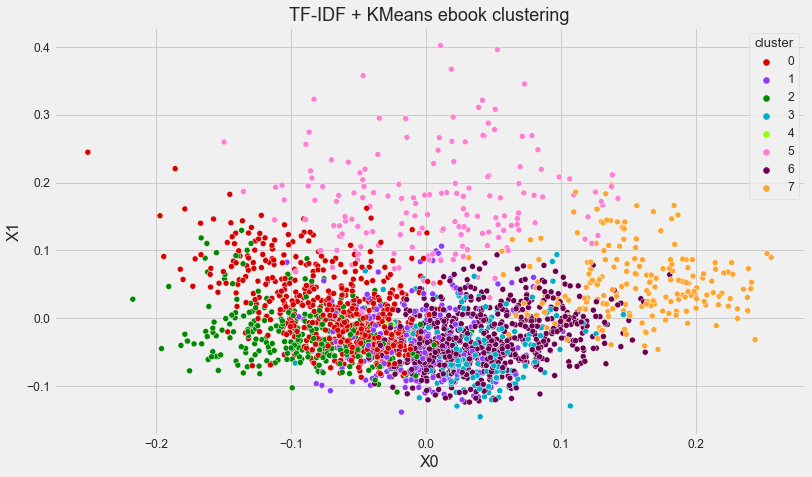

In [204]:
palette = sns.color_palette(cc.glasbey, n_colors=8)
plt.figure(figsize=(12, 7))
sns.scatterplot(data=X, x='x0', y='x1', hue='cluster',palette=palette)
plt.title("TF-IDF + KMeans ebook clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
plt.show()

#### Clustering content by 3 cluster

In [205]:
X2 = vectorizer.fit_transform(book_data['content'])

In [206]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X2.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [207]:
# initialize kmeans with 3 centroids
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(X2)

clusters2 = kmeans2.labels_

In [208]:
def get_top_keywords(n_terms):

    df = pd.DataFrame(X2.todense()).groupby(clusters2).mean() # groups the TF-IDF 
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(20)


Cluster 0
آموزشی,مطالعه,ایجاد,ارائه,ویندوز,سایت,یادگیری,وب,اطلاعات,نویسی,دانش,انگلیسی,آشنا,مطالب,طراحی,سیستم,افزار,آموزش,زبان,کتاب

Cluster 1
تغییر,ایجاد,زیادی,موفقیت,بدن,مهم,بیماری,توجه,کشور,علم,بررسی,اجتماعی,نظر,جامعه,جهان,دست,افراد,انسان,زندگی,کتاب

Cluster 2
نامه,جنگ,تاریخی,دست,ترجمه,ایرانی,رمان,منتشر,زندگی,آثار,فارسی,مجموعه,چاپ,نوشته,نویسنده,زبان,تاریخ,داستان,ایران,کتاب


In [209]:
X2 = pd.DataFrame(X2.toarray())

In [210]:
X2['cluster'] = clusters2
X2['x0'] = x0
X2['x1'] = x1

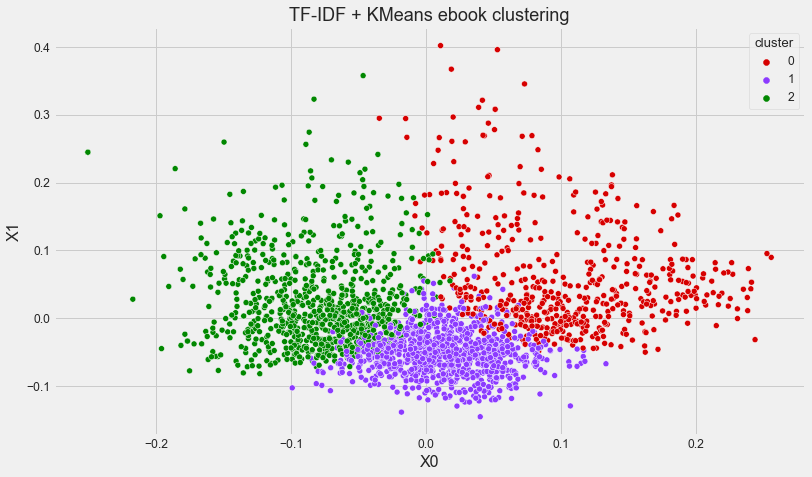

In [211]:
palette = sns.color_palette(cc.glasbey, n_colors=3)
plt.figure(figsize=(12, 7))
sns.scatterplot(data=X2, x='x0', y='x1', hue='cluster',palette=palette)
plt.title("TF-IDF + KMeans ebook clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
plt.show()

#### mapping cluster based on get_top_keywords

In [212]:
cluster_map = {0: "Amuzeshi", 1: "Ejtemaei", 2: "Tarikhi-Dastani"}
# apply mapping
X2['cluster'] = X2['cluster'].map(cluster_map)

In [213]:
Df = pd.DataFrame(list(zip(book_data['content'],X2['cluster'],book_data['category'])),columns=['content','cluster','category'])

In [214]:
Df[0:20]

,content,cluster,category
0,جیکس کشیش نویسنده سخنران آمریکایی سمینار جیکس ...,Ejtemaei,روانشناسی
1,کتاب دسترس خوانندگان محترم مشتمل تاریخ اوضاع س...,Tarikhi-Dastani,تاریخ ایران
2,دکتر فتح الله بینا تحصیلات پزشکی مقدمه کتاب نگ...,Tarikhi-Dastani,تاریخ ایران
3,مجموعه مطالبیست گروه اینجانب کتب انگلیسی ٢٠١۵ ...,Amuzeshi,علم و دانش
4,کتاب آسمان پرستاره نوشته کتی هایدن زبانی کودکا...,Amuzeshi,کودکان و نوجوانان
5,تاریخ مبارک غازانى فارسی رشیدالدین فضل الله بن...,Tarikhi-Dastani,تاریخ ایران
6,کتاب وبلاگ نویسی آموزش سکوی انتشار مبتنی وب بی...,Amuzeshi,طراحی وب سایت
7,استاد پروفسور ویلسون بیماریهای زنان هورمون زنا...,Ejtemaei,پزشکی و سلامت
8,آغاز تاریخ بشریت شکل کتاب تغییر روزی نوشتن لوح...,Amuzeshi,دسته بندی نشده
9,ساختار کتاب رویه درآیه پوروا هندواروپایی نمودا...,Tarikhi-Dastani,آموزش زبان


#### DBscan

In [215]:
X3 = vectorizer.fit_transform(book_data['content'])

In [216]:
dbs = DBSCAN(eps=2, min_samples=5)
pred_y = dbs.fit_predict(X3)

In [217]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X3.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [218]:
X3 = pd.DataFrame(X3.toarray())

In [219]:
X3['x0'] = x0
X3['x1'] = x1
X3['cluster'] = dbs.labels_

In [220]:
dbs.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

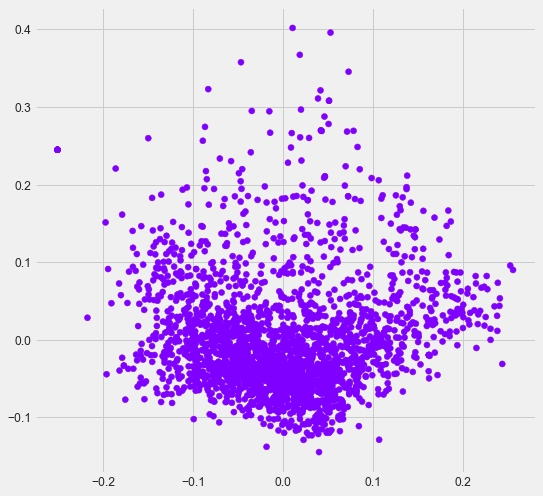

In [221]:
plt.scatter(X3['x0'],
            X3['x1'], 
            c=dbs.labels_,
            cmap='rainbow')